In [ ]:
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100%; !important } </style>'))

In [ ]:
import chess

# Global Constants

In [ ]:
class Globals:
    pass

#### Globals.MAX_EVALUATION_SCORE
A score that is higher than any achievable score from an evaluation. Minimax and alpha-beta start with this score but negative, so that the score that comes after is guaranteed to be the new best score (otherwise, a score that is not associated with any move would be the best score).

In [ ]:
Globals.MAX_EVALUATION_SCORE = 100_000_000

#### Globals.EVALUATION_SCORE_CHECKMATE
The score for a move that creates a checkmate situation. Such a move should always be chosen if on the winning side and should always be avoided if on the losing side, and the score should therefore be higher than that of any other type of move.

In [ ]:
Globals.EVALUATION_SCORE_CHECKMATE = 10_000_000

#### Globals.EVALUATION_SCORE_ENDGAME
The score for a move that creates a guaranteed win or loss as defined in the endgame tablebase. Such a move should always be chosen if on the winning side and should always be avoided if on the losing side, except if a checkmate is also possible. While a guaranteed win is theoretically just as good as a checkmate (under the assumption that the 50-move rule is disabled, which is the case by default), a checkmate gets the win faster and is therefore preferable.

In [ ]:
Globals.EVALUATION_SCORE_ENDGAME = 1_000_000

#### Globals.EVALUATION_SCORE_DRAW
The score for when a game ends in a draw. This is desirable if a player is in a disadvantageous position and undesirable if they're in an advantageous position. In any case, it is less significant than a checkmate or a guaranteed win or loss.

In [ ]:
Globals.EVALUATION_SCORE_DRAW = 500_000

#### Globals.PIECE_VALUES
The piece values for all chess pieces as defined in the Simplified Evaluation Function, see Michniewski, T. (2021).  
These values represent what each chess piece is worth and are based on rules that are defined on the web page linked above. They are used to evaluate attacks and promotions, as well as to determine which player is in a winning position.  
Kings do not need piece values, as both players always have exactly one king on the board.

In [ ]:
Globals.PIECE_VALUES = {
    'p': 100,   # Pawns
    'n': 320,   # Knights
    'b': 330,   # Bishops
    'r': 500,   # Rooks
    'q': 900    # Queen
}

#### Globals.PIECE_SQUARE_TABLES
The piece square tables for all chess pieces as defined in the Simplified Evaluation Function, see Michniewski, T. (2021).  
These tables contain a positional score for each position on the chess board for each piece type. This score represents how good a certain position is for the chess piece, with high scores being advantageous and low scores being disadvantageous. The argumentation for the values in these tables can be found on the web page linked above. These tables are used to evaluate positional advantages, castling and promotions, as well as to determine which player is in a winning position.

In [ ]:
Globals.PIECE_SQUARE_TABLES = {
    'p': [ # Pawns
        [   0,   0,   0,   0,   0,   0,   0,   0 ],
        [  50,  50,  50,  50,  50,  50,  50,  50 ],
        [  10,  10,  20,  30,  30,  20,  10,  10 ],
        [   5,   5,  10,  25,  25,  10,   5,   5 ],
        [   0,   0,   0,  20,  20,   0,   0,   0 ],
        [   5,  -5, -10,   0,   0, -10,  -5,   5 ],
        [   5,  10,  10, -20, -20,  10,  10,   5 ],
        [   0,   0,   0,   0,   0,   0,   0,   0 ]
    ],

    'n': [ # Knights
        [ -50, -40, -30, -30, -30, -30, -40, -50 ],
        [ -40, -20,   0,   0,   0,   0, -20, -40 ],
        [ -30,   0,  10,  15,  15,  10,   0, -30 ],
        [ -30,   5,  15,  20,  20,  15,   5, -30 ],
        [ -30,   0,  15,  20,  20,  15,   0, -30 ],
        [ -30,   5,  10,  15,  15,  10,   5, -30 ],
        [ -40, -20,   0,   5,   5,   0, -20, -40 ],
        [ -50, -40, -30, -30, -30, -30, -40, -50 ]
    ],

    'b': [ # Bishops
        [ -20, -10, -10, -10, -10, -10, -10, -20 ],
        [ -10,   0,   0,   0,   0,   0,   0, -10 ],
        [ -10,   0,   5,  10,  10,   5,   0, -10 ],
        [ -10,   5,   5,  10,  10,   5,   5, -10 ],
        [ -10,   0,  10,  10,  10,  10,   0, -10 ],
        [ -10,  10,  10,  10,  10,  10,  10, -10 ],
        [ -10,   5,   0,   0,   0,   0,   5, -10 ],
        [ -20, -10, -10, -10, -10, -10, -10, -20 ]
    ],

    'r': [ # Rooks
        [   0,   0,   0,   0,   0,   0,   0,   0 ],
        [   5,  10,  10,  10,  10,  10,  10,   5 ],
        [  -5,   0,   0,   0,   0,   0,   0,  -5 ],
        [  -5,   0,   0,   0,   0,   0,   0,  -5 ],
        [  -5,   0,   0,   0,   0,   0,   0,  -5 ],
        [  -5,   0,   0,   0,   0,   0,   0,  -5 ],
        [  -5,   0,   0,   0,   0,   0,   0,  -5 ],
        [   0,   0,   0,   5,   5,   0,   0,   0 ]
    ],

    'q': [ # Queen
        [ -20, -10, -10,  -5,  -5, -10, -10, -20 ],
        [ -10,   0,   0,   0,   0,   0,   0, -10 ],
        [ -10,   0,   5,   5,   5,   5,   0, -10 ],
        [  -5,   0,   5,   5,   5,   5,   0,  -5 ],
        [   0,   0,   5,   5,   5,   5,   0,  -5 ],
        [ -10,   5,   5,   5,   5,   5,   0, -10 ],
        [ -10,   0,   5,   0,   0,   0,   0, -10 ],
        [ -20, -10, -10,  -5,  -5, -10, -10, -20 ]
    ],

    'km': [ # King (middle game)
        [ -30, -40, -40, -50, -50, -40, -40, -30 ],
        [ -30, -40, -40, -50, -50, -40, -40, -30 ],
        [ -30, -40, -40, -50, -50, -40, -40, -30 ],
        [ -30, -40, -40, -50, -50, -40, -40, -30 ],
        [ -20, -30, -30, -40, -40, -30, -30, -20 ],
        [ -10, -20, -20, -20, -20, -20, -20, -10 ],
        [  20,  20,   0,   0,   0,   0,  20,  20 ],
        [  20,  30,  10,   0,   0,  10,  30,  20 ]
    ],

    'ke': [ # King (end game)
        [ -50, -40, -30, -20, -20, -30, -40, -50 ],
        [ -30, -20, -10,   0,   0, -10, -20, -30 ],
        [ -30, -10,  20,  30,  30,  20, -10, -30 ],
        [ -30, -10,  30,  40,  40,  30, -10, -30 ],
        [ -30, -10,  30,  40,  40,  30, -10, -30 ],
        [ -30, -10,  20,  30,  30,  20, -10, -30 ],
        [ -30, -30,   0,   0,   0,   0, -30, -30 ],
        [ -50, -30, -30, -30, -30, -30, -30, -50 ]
    ]
}

#### Globals.CHESS_PROBLEMS
A list of chess problems where the goal is for white to win in as few moves as possible. The search algorithms should find a valid list of moves, assuming the search depth is sufficient. Each chess problem is given an identifier that maps to the FEN code representing the board state at the start of the problem.  

The following chess problems are used:
- AJW: see Abbott, J. W. (1876).
- AF: see Abdurahmanović, F. (1975).
- LE: see Lücke, E. (1975).
- EK: see Erlinger, K. (1930).
- AD: see Abragam, D. (1949).
- BWS: see B. W. S. (1927).

In [ ]:
Globals.CHESS_PROBLEMS = {
    'AJW': '7n/3NR3/1P3p2/1p1kbN1B/1p6/1K6/6b1/1Q6',
    'AF' : '3KN3/2B2R2/6n1/8/4k2n/4p3/4B3/3R4',
    'LE' : '2N5/7B/3R4/Rb2k1p1/3rpr2/2B5/1NP2P1Q/4K3',
    'EK' : '8/8/5p2/5p2/2K5/2R2P2/2R2PN1/5Nk1',
    'AD' : '8/3k1P2/1K3B2/3B4/8/8/8/8',
    'BWS': '1r2k3/2Q3P1/2p3Kb/6n1/8/8/8/8'
}

#### Globals.CHESS_PROBLEM_MOVE_COUNT
The amount of moves it takes to solve each chess problem. This is the search depth that should be provided to the algorithm(s) in order to allow them to find such a solution.

In [ ]:
Globals.CHESS_PROBLEM_PLY_COUNT = {
    'AJW': 3,
    'AF' : 3,
    'LE' : 5,
    'EK' : 7,
    'AD' : 3,
    'BWS': 3
}

---

### Display of Chess-Problems

In the following the various chess problems are displayed in a graphical board representation.

#### AJW -  Abbott, J. W. (1876):

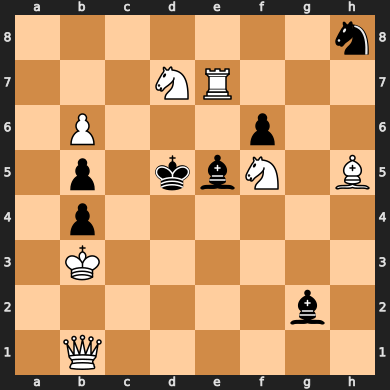

In [ ]:
AJW = Globals.CHESS_PROBLEMS['AJW']
board = chess.Board(AJW)
board

---
#### AF - Abdurahmanović, F. (1975):

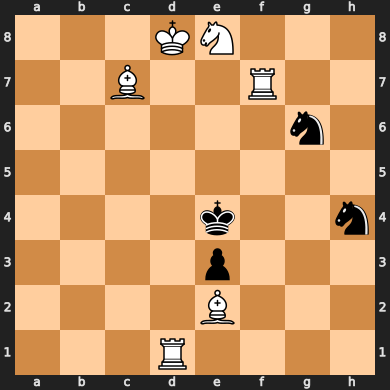

In [ ]:
AF = Globals.CHESS_PROBLEMS['AF']
board = chess.Board(AF)
board

---
#### LE - Lücke, E. (1975):

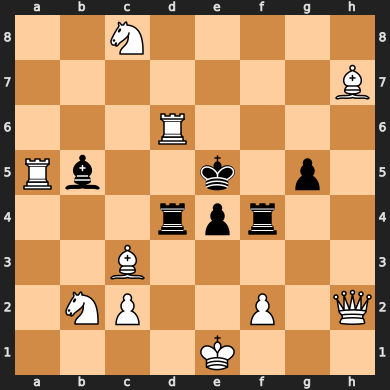

In [ ]:
LE = Globals.CHESS_PROBLEMS['LE']
board = chess.Board(LE)
board

---
#### EK - Erlinger, K. (1930):

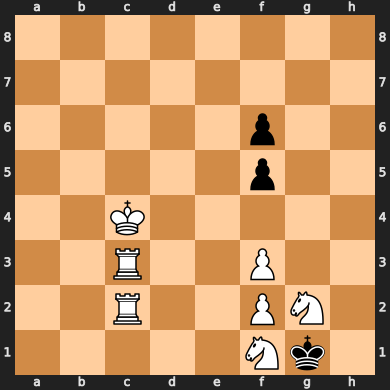

In [ ]:
EK = Globals.CHESS_PROBLEMS['EK']
board = chess.Board(EK)
board

---
#### AD - Abragam, D. (1949):

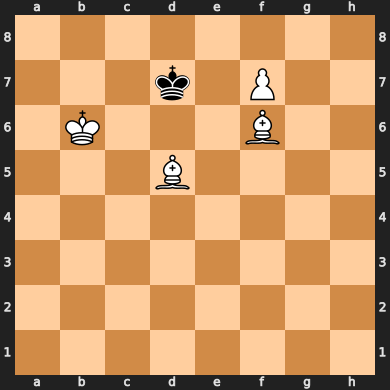

In [ ]:
AD = Globals.CHESS_PROBLEMS['AD']
board = chess.Board(AD)
board

---
#### BWS - B. W. S. (1927):

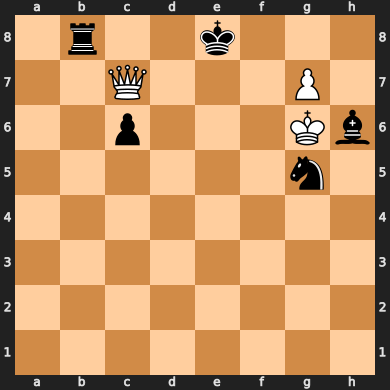

In [ ]:
BWS = Globals.CHESS_PROBLEMS['BWS']
board = chess.Board(BWS)
board

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ce9acd-52c5-4422-904d-8424da19408b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>